In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load datasets
df1 = pd.read_csv("(DS2)CARS_1.csv")
df2 = pd.concat([pd.read_csv("(DS1)train(1).csv"),
                 pd.read_csv("(DS1)test.csv")], ignore_index=True)
df3 = pd.read_csv("cars_data_clean.csv")

# Standardize - keep only: body_type, popularity, price
ds1 = pd.DataFrame({
    'body_type': df1['body_type'].str.lower().str.strip(),  # ← FIX HERE
    'popularity': df1['reviews_count'],
    'price': (df1['starting_price'] + df1['ending_price'])/2,
    'source': 'DS1'
})

ds2 = pd.DataFrame({
    'body_type': df2['body_type'].str.lower().str.strip(),  # ← FIX HERE
    'popularity': df2['times_viewed'],
    'price': df2['sale_price'],
    'source': 'DS2'
})

ds3 = pd.DataFrame({
    'body_type': df3['body'].str.lower().str.strip(),  # ← FIX HERE
    'popularity': df3['discountValue'],
    'price': df3['listed_price'],
    'source': 'DS3'
})

# Normalize each dataset separately (0-1 scale)
scaler = MinMaxScaler()
ds1['pop_norm'] = scaler.fit_transform(ds1[['popularity']])
ds2['pop_norm'] = scaler.fit_transform(ds2[['popularity']])
ds3['pop_norm'] = scaler.fit_transform(ds3[['popularity']])

# Combine
df = pd.concat([ds1, ds2, ds3], ignore_index=True)

print(f"Combined: {len(df)} vehicles from 3 datasets")
print("\nBody types after standardization:")
print(df['body_type'].value_counts())

# Analyze by body type
analysis = df.groupby('body_type').agg({
    'pop_norm': 'sum',
    'price': 'mean',
    'body_type': 'count'
}).rename(columns={'body_type': 'count'})

analysis['market_share_%'] = (analysis['count'] / len(df)) * 100

# Score & Rank
scaler = MinMaxScaler()
analysis['share_score'] = scaler.fit_transform(analysis[['market_share_%']]) * 100
analysis['pop_score'] = scaler.fit_transform(analysis[['pop_norm']]) * 100
analysis['afford_score'] = (1 - scaler.fit_transform(analysis[['price']])) * 100

analysis['overall_score'] = (
    0.35 * analysis['share_score'] +
    0.40 * analysis['pop_score'] +
    0.25 * analysis['afford_score']
)

result = analysis.sort_values('overall_score', ascending=False)

print("\n" + "="*70)
print("FINAL RANKING (All 3 Datasets Combined - CORRECTED)")
print("="*70)
print(result.head(10))

winner = result.index[0]
print(f"\n✅ GENUINE RECOMMENDATION: Electric {winner.upper()}")
print("="*70)

# Show top 3 details
print("\nTOP 3 VEHICLES:")
for i, (body_type, row) in enumerate(result.head(3).iterrows(), 1):
    print(f"\n{i}. {body_type.upper()}")
    print(f"   Vehicle Count: {int(row['count'])}")
    print(f"   Market Share: {row['market_share_%']:.2f}%")
    print(f"   Avg Price: ₹{row['price']/100000:.2f}L")
    print(f"   Overall Score: {row['overall_score']:.2f}/100")

Combined: 45415 vehicles from 3 datasets

Body types after standardization:
body_type
hatchback          19437
sedan              12069
suv                11006
muv                 1825
minivans             391
luxury suv           189
luxury sedan         163
luxury vehicles       72
pickup trucks         47
coupe                 43
convertibles          22
wagon                  9
convertible            8
pickup truck           4
hybrids                4
luxury                 2
hybrid                 1
minivan                1
Name: count, dtype: int64

FINAL RANKING (All 3 Datasets Combined - CORRECTED)
                   pop_norm         price  count  market_share_%  share_score  \
body_type                                                                       
hatchback        105.538196  3.802607e+05  19437       42.798635   100.000000   
sedan             43.529841  8.157945e+05  12069       26.574920    62.090965   
suv               41.788483  1.346316e+06  11006       24.234

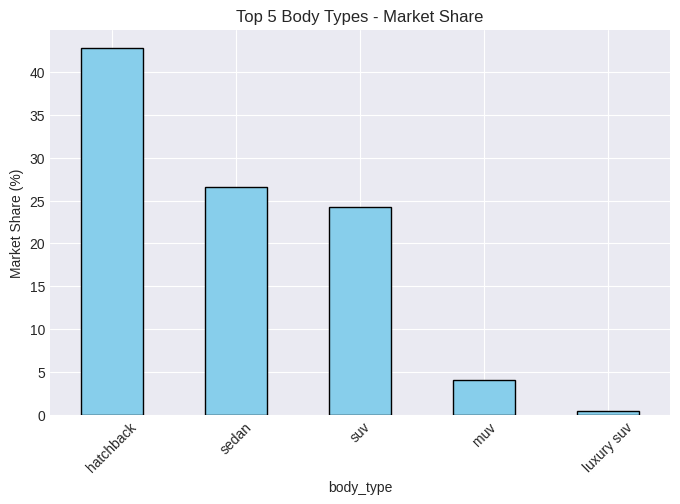

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


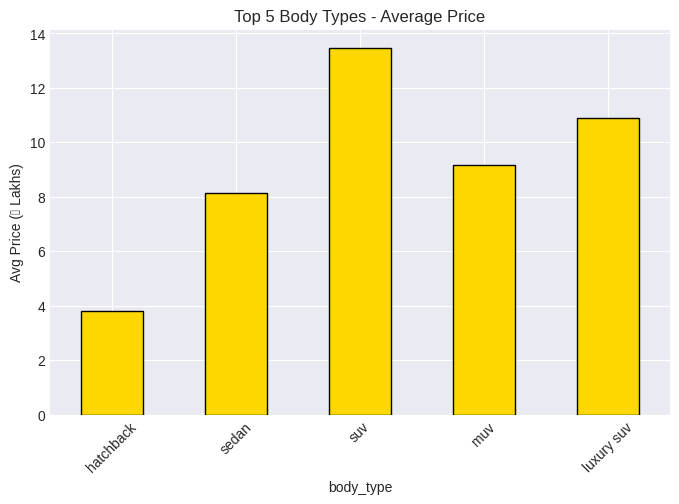

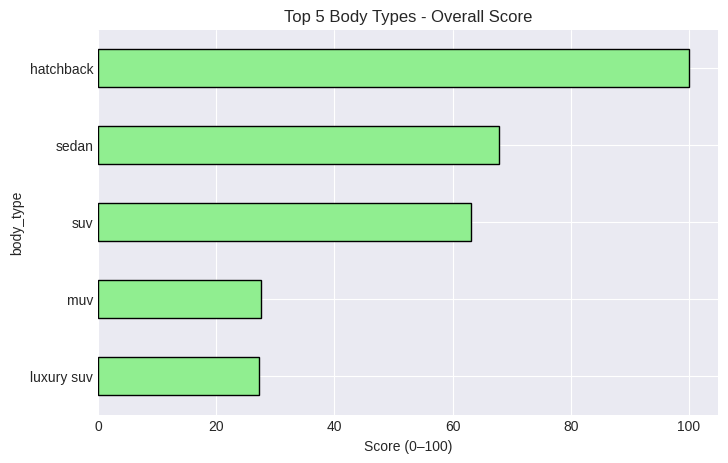

In [ ]:
import matplotlib.pyplot as plt

top5 = result.head(5)

# 1. Market Share by Body Type
plt.figure(figsize=(8,5))
top5['market_share_%'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 5 Body Types - Market Share")
plt.ylabel("Market Share (%)")
plt.xticks(rotation=45)
plt.show()

# 2. Average Price
plt.figure(figsize=(8,5))
(top5['price']/100000).plot(kind='bar', color='gold', edgecolor='black')
plt.title("Top 5 Body Types - Average Price")
plt.ylabel("Avg Price (₹ Lakhs)")
plt.xticks(rotation=45)
plt.show()

# 3. Overall Score
plt.figure(figsize=(8,5))
top5['overall_score'].plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title("Top 5 Body Types - Overall Score")
plt.xlabel("Score (0–100)")
plt.gca().invert_yaxis()
plt.show()
